# Autoencoder Tutorial 

# Part I : Visualize the autoencoder process 

In [7]:
import numpy as np
np.random.seed(13)
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import np_utils
from keras import backend as K

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
input_unit_size = 28 * 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [18]:
# show x_train, x_test, y_train, y_test
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)
print( x_train[0] )
print( y_train[0] )

<class 'numpy.ndarray'> (60000, 28, 28)
<class 'numpy.ndarray'> (60000,)
<class 'numpy.ndarray'> (10000, 28, 28)
<class 'numpy.ndarray'> (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 2

In [19]:
x_train = x_train.reshape(x_train.shape[0], input_unit_size)
x_train = x_train.astype('float32')
x_train /= 255.

x_test = x_test.reshape(x_test.shape[0], input_unit_size)
x_test = x_test.astype('float32')
x_test /= 255.

In [21]:
print( type(x_train), x_train.shape )
print( x_train[0] )

<class 'numpy.ndarray'> (60000, 784)
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0

In [31]:
# Building The Autoencoder Mdoel

# in order to plot in a 2D figure
encoding_dim = 2

# this is our input placeholder
input_img = Input(shape=(input_unit_size,))

# build the encoded layer & decoded layer, combine together with autoencoder
# encoder layers
encoded = Dense(256, activation='relu')(input_img)
# decoder layers 
decoded = Dense(input_unit_size, activation='tanh')(encoded)
# construct the autoencoder model
autoencoder = Model(inputs=input_img, outputs=decoded)

In [32]:
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [33]:
# model summary
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_19 (Dense)             (None, 784)               201488    
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________


In [34]:
# training
autoencoder.fit(x_train, 
                x_train,
                epochs=20,
                batch_size=256,
                shuffle=True
                )

Epoch 1/20
60000/60000 [==============================] - 2s - loss: 0.0305     
Epoch 2/20
60000/60000 [==============================] - 1s - loss: 0.0115     
Epoch 3/20
60000/60000 [==============================] - 1s - loss: 0.0089     
Epoch 4/20
60000/60000 [==============================] - 1s - loss: 0.0077     
Epoch 5/20
60000/60000 [==============================] - 1s - loss: 0.0070     
Epoch 6/20
60000/60000 [==============================] - 1s - loss: 0.0065     
Epoch 7/20
60000/60000 [==============================] - 1s - loss: 0.0062     
Epoch 8/20
60000/60000 [==============================] - 1s - loss: 0.0060     
Epoch 9/20
60000/60000 [==============================] - 1s - loss: 0.0058     
Epoch 10/20
60000/60000 [==============================] - 1s - loss: 0.0056     
Epoch 11/20
60000/60000 [==============================] - 1s - loss: 0.0055     - ETA
Epoch 12/20
60000/60000 [==============================] - 1s - loss: 0.0054     
Epoch 13/20
60000/60

## Visualization for autoencoding process

In [35]:
def draw_digit(data, row, col, n):
    size = int(np.sqrt(data.shape[0]))
    plt.subplot(row, col, n)
    plt.imshow(data.reshape(size, size))
    plt.gray()

(784,)


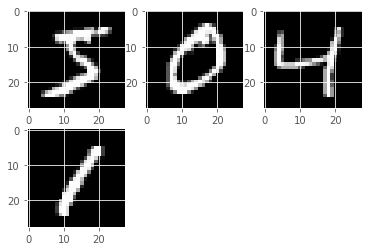

In [55]:
# Test for the draw_digit
print( x_train[0].shape )
draw_digit(x_train[0], 2, 3, 1)
draw_digit(x_train[1], 2, 3, 2)
draw_digit(x_train[2], 2, 3, 3)
draw_digit(x_train[3], 2, 3, 4)

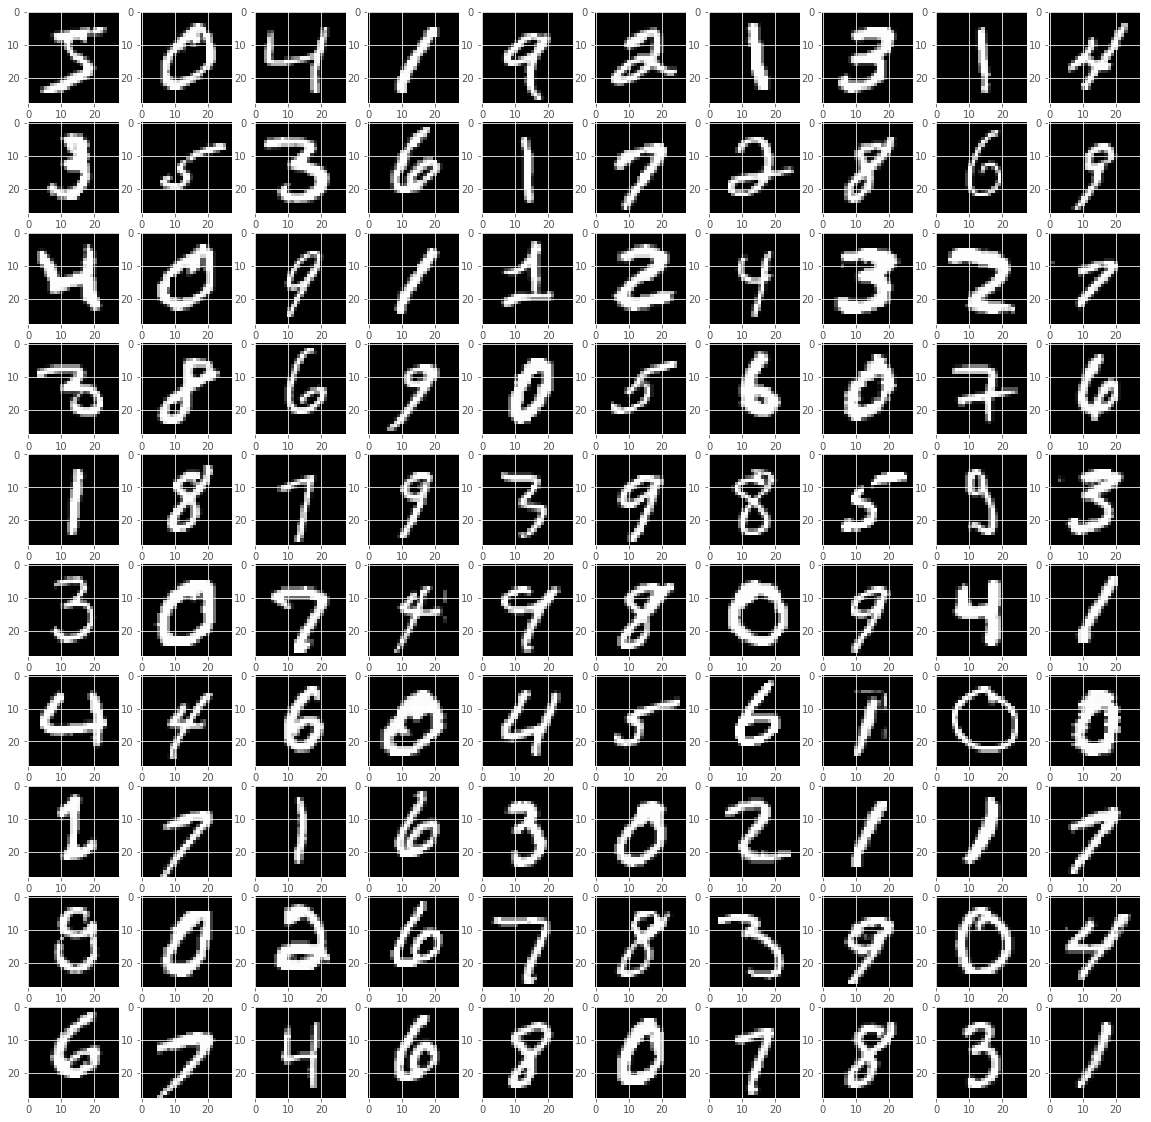

In [63]:
# orignal image (before encoding)
show_size = 10
total = 0
plt.figure(figsize=(20, 20))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(x_train[total], show_size, show_size, total+1)
        total+=1

plt.show()

In [74]:
# hidden layer images : images after encoding 
get_layer_output = K.function([autoencoder.layers[0].input],
                              [autoencoder.layers[1].output])

hidden_outputs = get_layer_output([x_train[0:show_size**2]])

In [75]:
print( type(hidden_outputs), len(hidden_outputs) )
print( hidden_outputs )

<class 'list'> 1
[array([[ 2.08641696,  0.29793847,  1.78603697, ...,  0.        ,
         0.87653482,  0.        ],
       [ 1.25051117,  0.10163978,  1.37987733, ...,  0.        ,
         0.84747571,  0.        ],
       [ 1.75833392,  0.17654124,  0.76921362, ...,  0.        ,
         0.83761728,  0.        ],
       ..., 
       [ 1.45350552,  0.28253418,  2.4577384 , ...,  0.        ,
         1.77038634,  0.        ],
       [ 1.5427345 ,  0.11319811,  2.71351171, ...,  0.        ,
         1.24815285,  0.        ],
       [ 0.28523344,  0.16682774,  0.36360526, ...,  0.        ,
         0.48524019,  0.        ]], dtype=float32)]


In [77]:
hidden_outputs = hidden_outputs[0]
print( type(hidden_outputs), hidden_outputs.shape)

<class 'numpy.ndarray'> (100, 256)


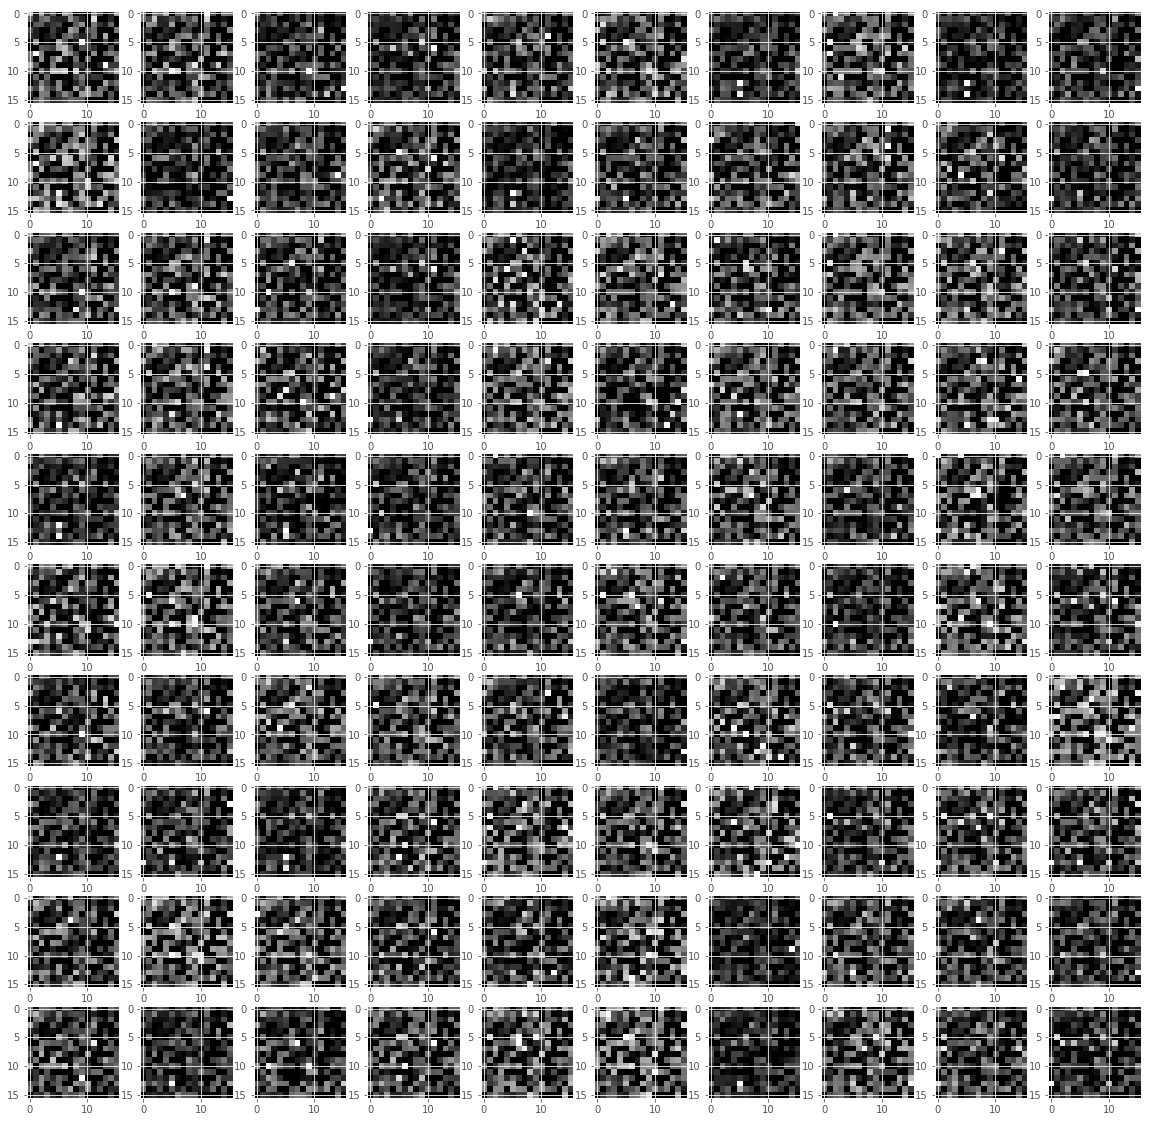

In [78]:
total = 0
plt.figure(figsize=(20, 20))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(hidden_outputs[total], show_size, show_size, total+1)
        total+=1
plt.show()

In [80]:
# reconstruct images: image after decoding
get_layer_output = K.function([autoencoder.layers[0].input],
                              [autoencoder.layers[2].output])

last_outputs = get_layer_output([x_train[0:show_size**2]])[0]

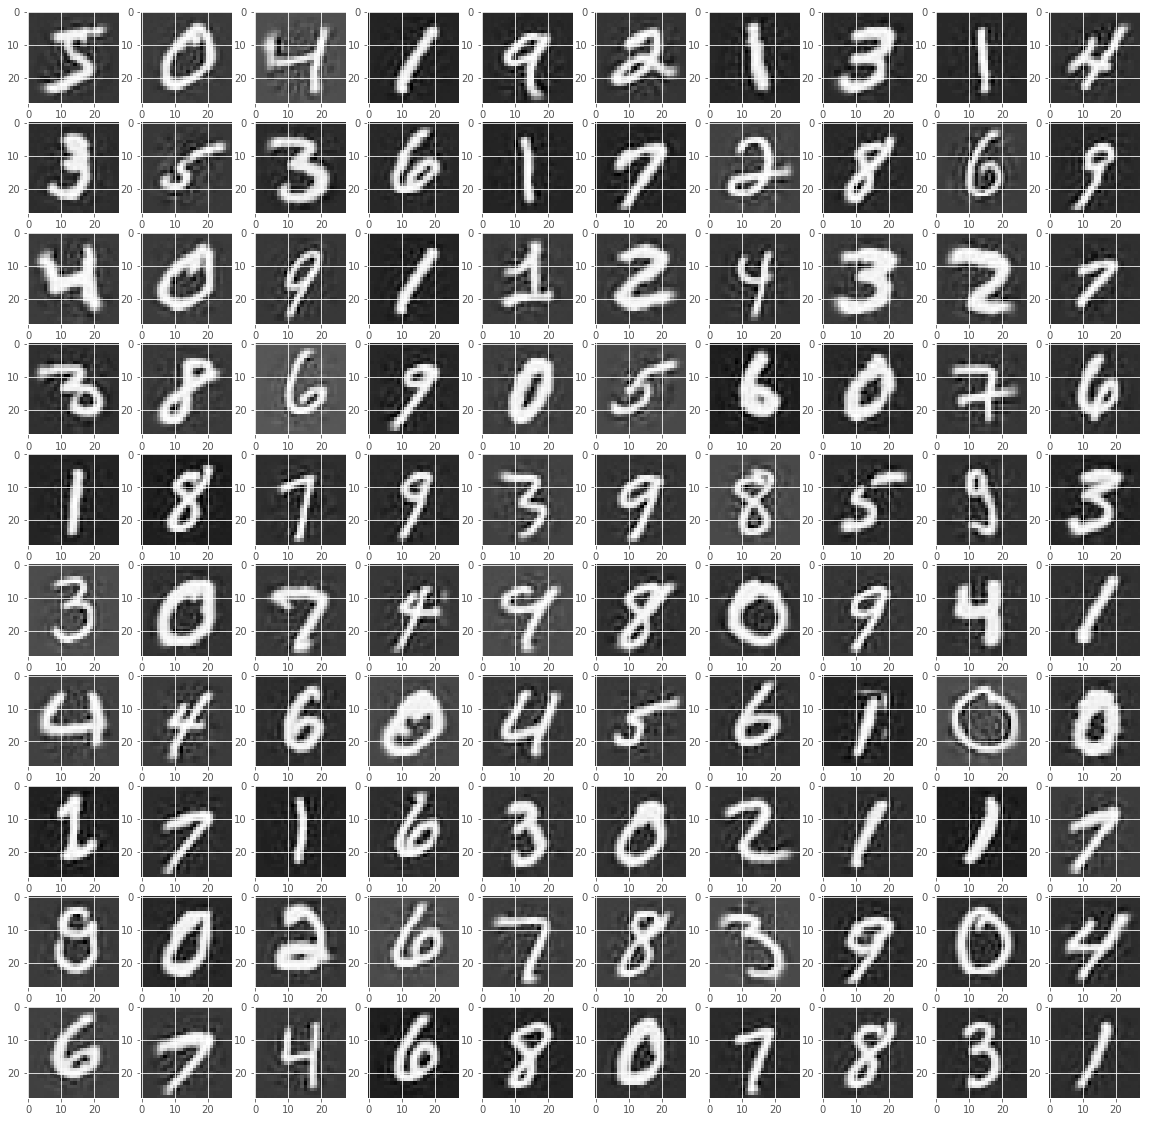

In [81]:
total = 0
plt.figure(figsize=(20, 20))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(last_outputs[total], show_size, show_size, total+1)
        total+=1
plt.show()

# Using Autoencoder to encode images into 2 dimensions

In [1]:
import numpy as np
# for reproducibility
np.random.seed(1337) 

In [2]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
(x_train, _), (x_test, y_test) = mnist.load_data()

In [6]:
print( type(x_train), x_train.shape )
print( x_train[0] )

<class 'numpy.ndarray'> (60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   

In [7]:
# data pre-processing
x_train = x_train.astype('float32') / 255. -0.5
x_test = x_test.astype('float32') / 255. -0.5
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

In [8]:
print(x_train.shape)
print(x_test.shape)
print(x_train[0])

(60000, 784)
(10000, 784)
[-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -

## Building the Model

In [9]:
# in order to plot in a 2D figure
encoding_dim = 2

# this is our input placeholder
input_img = Input(shape=(784,))

# build the encoded layer & decoded layer, combine together with autoencoder

# encoder layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

# decoder layers 
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

# construct the autoencoder model
autoencoder = Model(inputs=input_img, outputs=decoded)
# construct the encoder model for plotting
encoder = Model(inputs=input_img, outputs=encoder_output)

In [10]:
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [11]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_6 (Dense)              (None, 64)                704       
__________

In [12]:
# Training the model
autoencoder.fit(x_train, 
                x_train,
                epochs=30,
                batch_size=256,
                shuffle=True
                )

Epoch 1/30
60000/60000 [==============================] - 2s - loss: 0.0687     
Epoch 2/30
60000/60000 [==============================] - 1s - loss: 0.0564     
Epoch 3/30
60000/60000 [==============================] - 1s - loss: 0.0515     
Epoch 4/30
60000/60000 [==============================] - 1s - loss: 0.0489     
Epoch 5/30
60000/60000 [==============================] - 1s - loss: 0.0474     
Epoch 6/30
60000/60000 [==============================] - 1s - loss: 0.0462     
Epoch 7/30
60000/60000 [==============================] - 1s - loss: 0.0451     
Epoch 8/30
60000/60000 [==============================] - 1s - loss: 0.0443     
Epoch 9/30
60000/60000 [==============================] - 1s - loss: 0.0437     
Epoch 10/30
60000/60000 [==============================] - 1s - loss: 0.0431     
Epoch 11/30
60000/60000 [==============================] - 1s - loss: 0.0425     
Epoch 12/30
60000/60000 [==============================] - 1s - loss: 0.0421     
Epoch 13/30
60000/60000 [

### Visualization

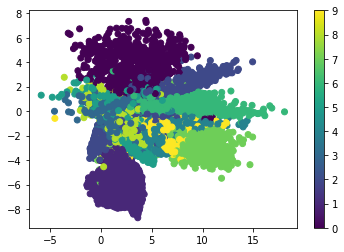

In [13]:
# plotting

encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:,0], encoded_imgs[:,1], c=y_test)
plt.colorbar()
plt.show()

# Part III : variational autoencoder

This part will demonstrate how to build a variational autoencoder   
Reference: "Auto-Encoding Variational Bayes" https://arxiv.org/abs/1312.6114

Variational autoencoders are a slightly more modern and interesting on autoencoding  
What is a variational autoencoder ? Its a type of autoencoder with added constrains on the encoded representations being learned. More precisely, it is an autoencoder that learns a latent variable model for its input data. So instead of letting your neural network learn an arbitrary function, you are learning the parameters of a probability/distribution modeling your data. If you sample points from this distribution, you can generate new input data samples: a VAE is a "generative model".

How does a variational autoencoder work?

- First, an encoder network turns the input samples x into two parameters in a latent space, which we will note z_mean and z_log_sigma. Then we randomly sample similar points z from the latent normal distribution that is assumed to generate the data, via z = z_mean + exp(z_log_sigma)*epsilon, where epsilon is a random normal tensor. Finally, a decoder network maps these latent space points back to the original input data.

- The parameters of the model are trained via two loss functions: a reconstruction loss forcing the decoded samples to match the initial inputs(just like in our previous autoencoders), and the KL divergence between the learned letent distribution and the prior distribution, acting as a regularization term. You could actually get rid of this latter term entirely, although it does help in learning well-formed latent spaces and reducing overfitting to the training data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
from keras.layers import Input, Dense, Lambda, Layer
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
batch_size = 100
original_dim = 28 * 28
latent_dim = 2
intermediate_dim = 256
epochs = 50
epsilon_std = 1.0

In [5]:
# here is our encoder network, mapping inputs to our latent distribution parameters
x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

In [7]:
# we can use these parameters to sample new similar points from the latent space
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., 
                             stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [8]:
# note that "output_shape" isn't necessary with the TensorFlow backend
# z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])
z = Lambda(sampling)([z_mean, z_log_var])

In [10]:
# Finally we can map these sampled latent points back to reconstructed inputs
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

What we've done so far allows us to instantiate 3 models:
- an end-to-end autoencoder mapping inputs to reconstructions
- an encoder mapping inputs to the latent space
- a generator that can take points on the latent space and will output the corresponding reconstructed samples

In [12]:
# end-to-end autoencoder
vae = Model(x, x_decoded_mean)

# encoder, from inputs to latent space
encoder = Model(x, z_mean)

In [15]:
# generator, from latent space to reconstructed inputs
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

We train the model using the end-to-end model, with a custom loss function: the sum of a reconstruction term, and the KL divergence regularization term.

In [20]:
def vae_loss(x, x_decoded_mean):
    xent_loss = original_dim * metrics.binary_crossentropy(x, x_decoded_mean)
    kl_loss = -0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return xent_loss + kl_loss

In [21]:
vae.compile(optimizer="rmsprop", loss=vae_loss)

In [23]:
vae.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (100, 784)            0                                            
____________________________________________________________________________________________________
dense_1 (Dense)                  (100, 256)            200960                                       
____________________________________________________________________________________________________
dense_2 (Dense)                  (100, 2)              514                                          
____________________________________________________________________________________________________
dense_3 (Dense)                  (100, 2)              514                                          
___________________________________________________________________________________________

### Train our VAE on MNIST digits:

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [25]:
print(type(x_train), "x_train:", x_train.shape)
print(type(x_test), "x_test", x_test.shape)

<class 'numpy.ndarray'> x_train: (60000, 784)
<class 'numpy.ndarray'> x_test (10000, 784)


In [27]:
# training
vae.fit(x_train,
        x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test)
       )

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 166.3757 - val_loss: 165.2374
Epoch 2/50
60000/60000 [==============================] - 4s - loss: 162.9381 - val_loss: 161.8645
Epoch 3/50
60000/60000 [==============================] - 4s - loss: 160.5408 - val_loss: 159.7345
Epoch 4/50
60000/60000 [==============================] - 4s - loss: 158.6197 - val_loss: 158.2209
Epoch 5/50
60000/60000 [==============================] - 4s - loss: 157.0799 - val_loss: 156.9072
Epoch 6/50
60000/60000 [==============================] - 3s - loss: 155.9089 - val_loss: 155.6562
Epoch 7/50
60000/60000 [==============================] - 3s - loss: 154.9678 - val_loss: 154.9209
Epoch 8/50
60000/60000 [==============================] - 3s - loss: 154.1988 - val_loss: 154.4631
Epoch 9/50
60000/60000 [==============================] - 3s - loss: 153.6306 - val_loss: 154.2354
Epoch 10/50
60000/60000 [==============================] - 

Because our latent space is two-dimentional, there are a few cool visualizations that can be done at this point. One is to different classes on the latent 2D plane:

In [28]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)

In [30]:
print( type(x_test_encoded), x_test_encoded.shape )

<class 'numpy.ndarray'> (10000, 2)


In [32]:
# x_test_encoded[:,0]

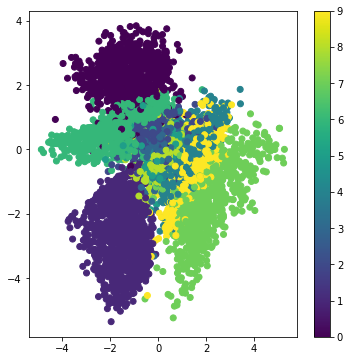

In [35]:
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:,0], x_test_encoded[:,1], c=y_test)
plt.colorbar()
plt.show()

Each of these colored clusters is a type of digit. Close clusters are digits that are structurally similar(i.e. digits that share information in the latent space).

Because the VAE is a generative model, we can also use it to generate new digits!  
Here we will scan the latent plane, sampling latent points at regular intervals, and generating the corresponding digit for each of these points. This gives us a visualiztion of the latent manifold that "generates" the MNIST digits.

In [36]:
# display a 2D manifold of the digits
n = 15 # figure with 15 x 15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, -15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

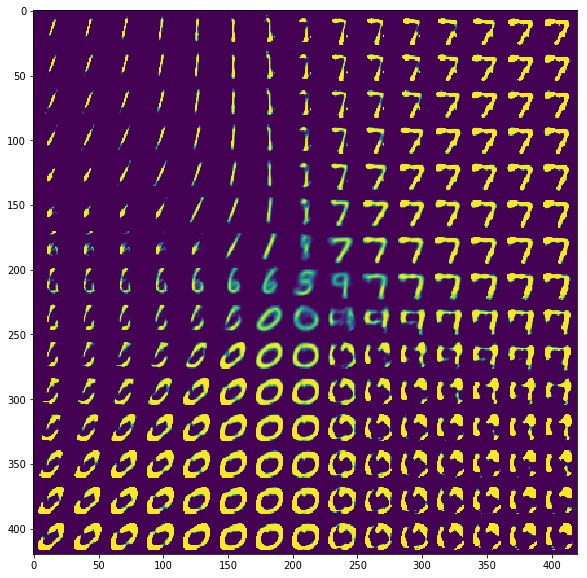

In [37]:
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]]) * epsilon_std
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()